In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import gzip
import json

### Загрузим данные

In [7]:
file_path = "../json/Video_Games_5.json.gz"

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield json.loads(l)
        

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

ds = getDF(file_path)

In [8]:
ds.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [94]:
ds['overall'].sort_values()

315180    1.0
479303    1.0
479302    1.0
161846    1.0
407119    1.0
         ... 
216916    5.0
216914    5.0
216913    5.0
216942    5.0
248788    5.0
Name: overall, Length: 497577, dtype: float64

### Overall это итоговая оценка пользователя, asin номер товара

In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 46.0+ MB


In [22]:
ds[~ds['image'].isna()]['image']

612       [https://images-na.ssl-images-amazon.com/image...
670       [https://images-na.ssl-images-amazon.com/image...
874       [https://images-na.ssl-images-amazon.com/image...
957       [https://images-na.ssl-images-amazon.com/image...
1738      [https://images-na.ssl-images-amazon.com/image...
                                ...                        
497462    [https://images-na.ssl-images-amazon.com/image...
497509    [https://images-na.ssl-images-amazon.com/image...
497529    [https://images-na.ssl-images-amazon.com/image...
497547    [https://images-na.ssl-images-amazon.com/image...
497571    [https://images-na.ssl-images-amazon.com/image...
Name: image, Length: 3634, dtype: object

<AxesSubplot:>

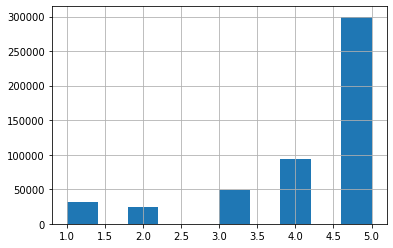

In [24]:
ds['overall'].hist()

In [93]:
ds.groupby('reviewerID').count().sort_values('reviewText', ascending=False)

,overall,verified,reviewTime,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,asin_mean_rating
reviewerID,,,,,,,,,,,,
A3V6Z4RCDGRC44,815,815,815,815,815,815,815,815,653,358,1,815
AJKWF4W7QD4NS,795,795,795,795,795,795,795,795,579,452,0,795
A3W4D8XOGLWUN5,521,521,521,521,521,521,521,521,391,222,0,521
A2QHS1ZCIQOL7E,472,472,472,472,472,472,472,472,88,305,0,472
A2TCG2HV1VJP6V,453,453,453,453,453,453,453,453,144,175,0,453
...,...,...,...,...,...,...,...,...,...,...,...,...
A62WVTHT4W2E6,15,15,15,15,15,0,15,15,2,14,14,15
A28GUSLMZNR8MV,7,7,7,7,7,0,7,7,0,1,0,7
A1LZ5L7E7V4AW9,11,11,11,11,11,0,11,11,0,10,0,11


In [64]:
ds.groupby('asin')["asin_mean_rating"].mean()

asin
0700026398    3.125000
0700026657    3.692308
0700099867    3.300000
0804161380    4.816327
3828770193    4.333333
                ...   
B01HFRICLE    4.428571
B01HGPUTCA    4.600000
B01HH6JEOC    3.625000
B01HIZF7XE    4.574468
B01HIZGKOE    3.500000
Name: asin_mean_rating, Length: 17408, dtype: float64

### Посмотрим есть ли корреляция между количеством оценок и средним рейтингом продукта

In [ ]:
mean = ds.groupby('asin')['overall'].mean()
ds["asin_mean_rating"] = ds['asin'].apply(lambda x: mean[x])

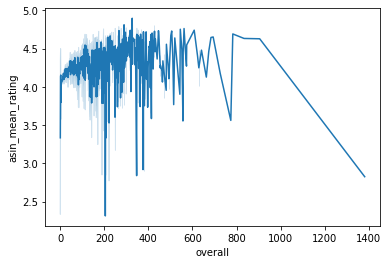

In [67]:
sns.lineplot(x= ds.groupby('asin')['overall'].count(), y=ds.groupby('asin')["asin_mean_rating"].mean())
plt.show()

In [88]:
ds[ds['asin'] == 'B00178630A']['reviewText'][10:40].values

array(['played the demo and had a blast, gotta finish it. came in 3 days.i always get quality on amazon.',
       'Cool at first but gets monotonous',
       'My copy came with a used code, but I managed to get a refund and now have a working copy.',
       "let's be honest, this game was beautiful, but the play is just dull",
       'Good game, but gets boring really quick without people to play with, and now that virtually no one plays anymore, its pointless.',
       'A great successor to Diablo 2. An updated skill system makes it easy to customize your character and set skills and attacks to suit your play style. The graphics are smooth and pretty. The game has got a pretty good story, with fun, addicting gameplay. But when you beat the game is when the game really gets going, with an endless amount of end game content to keep improving your character, getting higher ranks and better gear as you progress up through the many difficulties.\nHighly recommended to any action rpg fans, 

###  Похоже игра с самым большим числом комментариев это Diablo 3. Какой либо явной зависимости не наблюдается

### Построим простую систему, где будем считать среднее значение игры, и использовать его в качестве предсказания, возьмем такую систему за baseline

In [95]:
ds

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,asin_mean_rating
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN,3.692308
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN,3.692308
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN,3.692308
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN,3.692308
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN,3.692308
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497572,4.0,True,"07 1, 2017",AVECM71LSZLC5,B01HGPUTCA,boris teplitskiy,not OEM but good replacement parts,Four Stars,1498867200,NaN,NaN,NaN,4.600000
497573,3.0,True,"08 20, 2018",A1RS06313BL6WN,B01HH6JEOC,Tom Stopsign,Okay stuff.,Three Stars,1534723200,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O...",NaN,3.625000
497574,3.0,True,"08 7, 2017",ACIZ77IGIX2JL,B01HH6JEOC,Era,This does add some kids room things that are v...,Only buy on sale.,1502064000,NaN,"{'Edition:': ' Kids Room', 'Platform:': ' PC O...",NaN,3.625000
497575,4.0,False,"08 5, 2018",A34GG58TJ1A3SH,B01HIZF7XE,seamonkey10,I think I originally began playing Bioshock se...,"It's Okay, Nothing Profound",1533427200,NaN,"{'Edition:': ' Collection', 'Platform:': ' Xbo...",NaN,4.574468


In [96]:
from datetime import datetime

def split_by_time(df, target_col = 'overall', test_size=0.33, pattern="%m %d, %Y", col="reviewTime"):
    data = df.copy()
    data[col] = data[col].astype(str).apply(lambda x: datetime.strptime(x, pattern))
    
    threshold = int(len(data) * (1 - test_size)) 
    sorted_data = data.sort_values(col)
    
    X_train = sorted_data.iloc[:threshold]
    y_train = X_train[target_col]
    X_train.drop(columns=[target_col], inplace=True)
    
    X_test = sorted_data.iloc[threshold:]
    y_test = X_test[target_col]
    X_test.drop(columns=[target_col], inplace=True)
    
    return X_train, X_test, y_train, y_test

In [98]:
X_train, X_test, y_train, y_test = split_by_time(ds)

/home/mikhail/PycharmProjects/intro/venv/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [113]:
X_train

,verified,reviewTime,overall,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,asin_mean_rating
6043,False,1999-10-14,5.0,A2AXQTB83VMK4L,B0000296O5,Amazon Customer,I'm having the most fun I've ever had on PlayS...,Best RPG Ever!,939859200,NaN,{'Format:': ' Video Game'},NaN,4.272388
6978,False,1999-11-05,4.0,A2T04VAIXSKJH2,B00002NDRY,Stefan,I'm usually not crazy about real-time strategy...,Good real time strategy game,941760000,3,NaN,NaN,4.447761
5993,False,1999-11-10,4.0,AMGJMFJ63DWWH,B000021XYY,Ed Matuskey,"This game actually scared me a couple times, a...","A good game, but way too short!",942192000,10,NaN,NaN,3.785714
5861,False,1999-11-10,5.0,A1QA8K3LD9K892,B000021Y5F,Chris Adamson,Williams made games for hard-core arcade gamer...,A cool 80's artifact,942192000,68,NaN,NaN,4.714286
4124,True,1999-11-10,5.0,A3VWWQT4XDSBGQ,B00000K4AX,Joshua W. Fenton,"If you loved Half-Life, this is a must buy. I ...",AWESOME!,942192000,5,NaN,NaN,4.230769
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373227,True,2015-07-23,5.0,AHHK24WV5LG26,B00MIP0I34,sewing grannie,Such a fun game.,Fun Game,1437609600,NaN,NaN,NaN,3.464286
258426,True,2015-07-23,5.0,A1EC0RPI8YRZ9B,B005THAX5Q,Clementino Rios,good product recommended,good,1437609600,NaN,{'Format:': ' Video Game'},NaN,2.659091
376498,True,2015-07-23,4.0,A2GITTBF55NDMZ,B00N2LR39U,ben bradford,great game if you're into this kind of thing,Four Stars,1437609600,NaN,NaN,NaN,4.571429
209023,True,2015-07-23,5.0,A1VVHN9TL6J7BP,B0034ZOAKO,Felix joel Vasquez colon,Excellent,Five Stars,1437609600,NaN,NaN,NaN,3.857143


In [110]:
ds.loc[6043]

overall                                                             5
verified                                                        False
reviewTime                                                10 14, 1999
reviewerID                                             A2AXQTB83VMK4L
asin                                                       B0000296O5
reviewerName                                          Amazon Customer
reviewText          I'm having the most fun I've ever had on PlayS...
summary                                                Best RPG Ever!
unixReviewTime                                              939859200
vote                                                              NaN
style                                      {'Format:': ' Video Game'}
image                                                             NaN
asin_mean_rating                                              4.27239
Name: 6043, dtype: object

In [114]:
X_train['overall'] = y_train
mean_overall = X_train.groupby('asin')['overall'].mean()

In [119]:
mean_overall.loc['6050036071']

4.642857142857143

In [144]:
from sklearn.exceptions import NotFittedError
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

class MeanPrediction:
    mean = None
    
    def fit(self, X_train, y_train):
        X_train['overall'] = y_train
        mean = X_train.groupby('asin')['overall'].mean()
        return

    def predict(self, X_test):
        if mean is None:
            raise NotFittedError
        if set(mean.index).issubset(set(X_test['asin'].unique())):
            print('One or more of products was not in train set')
        return X_test['asin'].apply(lambda x: mean.loc[x])
    
    def rmse(self, X_test, y_test, X_train=None, y_train=None):
        if (X_train is not None) and (y_train is not None):
            print("RMSE on train: {:.2f}".format(mean_squared_error(y_train, self.predict(X_train), squared=False)))
        print("RMSE on test: {:.2f}".format(mean_squared_error(y_test, self.predict(X_test), squared=False)))
        
    def r2_score(self, X, y):
        print("R2: {:.2f}".format(r2_score(y, self.predict(X))))

In [145]:
mean_predict = MeanPrediction()
mean_predict.fit(X_train, y_train)
mean_predict.rmse(X_test, y_test, X_train, y_train)
mean_predict.r2_score(X_train, y_train)
mean_predict.r2_score(X_test, y_test)

RMSE on train: 1.09
RMSE on test: 1.09
R2: 0.17
R2: 0.11


### Теперь попробуем разные подходы и попробуем улучшить этот результат

In [148]:
!pip3 install surprise

  Using cached surprise-0.1-py2.py3-none-any.whl (1.8 kB)
  Using cached scikit-surprise-1.1.1.tar.gz (11.8 MB)
  ERROR: Command errored out with exit status 1:
   command: /home/mikhail/PycharmProjects/intro/venv/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-w9pygkp4/scikit-surprise/setup.py'"'"'; __file__='"'"'/tmp/pip-install-w9pygkp4/scikit-surprise/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-29i5cspv
       cwd: /tmp/pip-install-w9pygkp4/scikit-surprise/
  Complete output (56 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.8
  creating build/lib.linux-x86_64-3.8/surprise
  copying surprise/accuracy.py -> build/lib.linux-x86_64-3.8/surprise
  copying surprise/dataset.py -> build/lib.linux-x86_64-3.8/surprise
  cop

You should consider upgrading via the '/home/mikhail/PycharmProjects/intro/venv/bin/python -m pip install --upgrade pip' command.


In [146]:
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate

ModuleNotFoundError: No module named 'surprise'